##### data-conditioning notebook--obtain and scrub
***

## Final Project Submission

Please fill out:
* Student name: Jamel Dargan
* Student pace: full - time
* Scheduled project review date/time: 
* Instructor name: Carrasco
* Blog post URL:


****
#### --Obtaining the Data--

# Importing Libraries and Data

## Previewing Column Names and Descriptions for King County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Importing required libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns

## Importing data

In [2]:
data = pd.read_csv('kc_house_data.csv')

## Viewing dataframe information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


> **Noting missing values in `waterfront`, `view`, and `yr_renovated`; data types for `date` and `sqft_basement` for further inspection**

## Viewing first rows and data characteristics

In [4]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# viewing the first rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


> Noting decimals in `floors`, `waterfront`, `view`, and `yr_renovated` for further inspection.
We also have some missing data and basements with 0 square feet.

In [5]:
# understanding the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> Noting that `sqft_basement` and `date` are not described, since they are not being treated as numeric.

## Inspecting possible categorical data data - types

In [6]:
# setting to view all columns
pd.set_option('display.max_rows', 30)

# checking values
for col in data.columns:
    if col in ['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade',
               'yr_built', 'yr_renovated', 'zipcode']:
        display(data[col].value_counts())
        print("-"*80)
        
print("yr_built: ", data.yr_built.min(), "-->",
      data.yr_built.max(), data.yr_built.dtype)
print("-"*80)

print("yr_renovated: ", data.yr_renovated.min(), "-->",
      data.yr_renovated.max(), data.yr_renovated.dtype)
print("-"*80)

print("Zip codes: \n\n", data.zipcode.unique(), data.zipcode.dtype)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

--------------------------------------------------------------------------------


2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

--------------------------------------------------------------------------------


0.0    19075
1.0      146
Name: waterfront, dtype: int64

--------------------------------------------------------------------------------


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

--------------------------------------------------------------------------------


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

--------------------------------------------------------------------------------


7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

--------------------------------------------------------------------------------


2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

--------------------------------------------------------------------------------


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

--------------------------------------------------------------------------------


98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

--------------------------------------------------------------------------------
yr_built:  1900 --> 2015 int64
--------------------------------------------------------------------------------
yr_renovated:  0.0 --> 2015.0 float64
--------------------------------------------------------------------------------
Zip codes: 

 [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039] int64


### Inspection Notes:

* waterfront:  boolean (0 or 1)
* view:  possibly the number of times the property was viewed prior to most recent sale (0-4)
* condition: (1-5)
* grade: (1-13)
* yr_built:  ___convert from int___ to datetime or not?
* yr_renovated:  ___convert from float___ to int or datetime?
* zipcode: ___convert from float to int___

*****
#### --Scrubbing the Data--

## Dealing with Missing Values

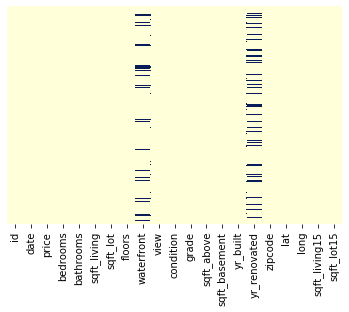

In [7]:
# using a heatmap to visualize where values are missing
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

`waterfront` and `yr_renovated` clearly need some attention.

In [8]:
# creating a copy of the dataframe for cleaning
data_f = data.copy()

### `waterfront`

In [9]:
# viewing a sampling of rows with null `waterfront` values
data_f[data_f['waterfront'].isna()].tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,0.0,3,8,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,2.0,3,9,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,3,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,3,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


We can inspect a selection of these properties using the `folium` library to verify their proximity to waterfront locations. Plan to convert nulls to 0s, barring controverting discovery.

In [10]:
# Random sampling 5 properties where `waterfront` is null
# wf_nulls = data_f.loc[data_f['waterfront'].isna(), {'waterfront', 'lat', 'long'}]
# random_waterfront = wf_nulls.sample(n=5)
# random_waterfront

"""
	waterfront	lat	long
6159	NaN	47.6058	-122.300
9425	NaN	47.4862	-121.718
12203	NaN	47.6819	-122.389
3677	NaN	47.3357	-122.175
2887	NaN	47.4487	-122.033
"""

# hard - coding to prevent re - sampling on notebook restarts after cleaning data
wf_null_list = [[47.6058, -122.300], [47.4862, -121.718],
                [47.6819, -122.389], [47.3357, -122.175],
                [47.4487, -122.033]]

### Importing necessary libraries

In [11]:
# King County lat./ Long. coordinates: 47.5480° N, -121.9836° W
import os # for access to file directories

import json
import folium # mapping library

# also importing folium's `MarkerCluster` plug-in to group map pins
# when zoomed - out
from folium.plugins import FastMarkerCluster

### Mapping `waterfront` with Folium

In [12]:
# using property coordinates for marker locations
locations = wf_null_list

# getting residences' lat/ lon coordinates to separate lists
lats = [location[0] for location in locations]
lons = [location[1] for location in locations]

# create a map object, centered on the mean coordinates for the residences
m = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='Cartodb Positron',
    zoom_start=7
)

# creating a cluster to group all markers on the zoomed - out map
FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)

# adding markers to the map and saving
folium.LayerControl().add_to(m)
m.save(os.path.join('results', '5_MarkerCluster1.html'))

m

These properties are not on the waterfront

In [13]:
# fill `waterfront` nulls with 0s to indicate
# they are not on the waterrfront
data_f.waterfront.fillna(value=0, inplace=True)
data_f.waterfront.dtype

dtype('float64')

This column does not need decimals.
Rounding `waterfront` to a single digit and casting as a 'category' data type.

In [14]:
# rounding the column down and casting as an integer
data_f.waterfront = data_f.waterfront.round(0).astype('int64').astype('category')

In [15]:
display(data_f.waterfront.dtype)
data_f[data_f['waterfront'] == 1].head(1)

CategoricalDtype(categories=[0, 1], ordered=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.5,2753,65005,1.0,1,2.0,5,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513


### `view`

Searching for commonalities among NaN entries for this feature

In [16]:
# setting to view all rows in this set (there are 63)
pd.set_option('display.max_rows', 70)
# viewing rows
data_f.loc[data_f['view'].isna(), (['id', 'date', 'grade', 'view'])]

,id,date,grade,view
7,2008000270,1/15/2015,7,NaN
114,8961960160,10/28/2014,9,NaN
129,7853210060,4/6/2015,7,NaN
205,3456000310,8/4/2014,9,NaN
487,1895000260,7/21/2014,6,NaN
590,2525069041,9/4/2014,7,NaN
938,1324079046,1/20/2015,7,NaN
1313,7558700030,4/13/2015,12,NaN
1364,9468200140,8/19/2014,7,NaN
1701,3121069036,12/8/2014,8,NaN


These properties are highly rated, but have no recorded views. Perhaps they were purchased site - unseen, in the area's competitive market.

I wonder whether any of them have previously been sold? Are any of the IDs duplicated (flipped in a short period of time)?

In [17]:
# instantiating a variable for the dataframe created above
null_views_df = data_f.loc[data_f['view'].isna(), (['id', 'date', 'grade'])]

# and a variable for duplicate property IDs
duplicate_ids_df = data_f[data_f.duplicated(['id'])]

# counting null views with duplicate IDs
filter_1 = null_views_df.id.isin(duplicate_ids_df.id).sum()
filter_1

0

None of the homes with null views have duplicate IDs. This group makes me curious.

Converting these values to 0s, but I may return to this group, depending on our central questions (to be developed in the next notebook section).

In [18]:
# now we can convert null values to 0s
print("Column nulls before processing: ", data_f.view.isna().sum())
data_f['view'].fillna(0, inplace=True)

# verify no null values remain in `view`
print("-"*72, "\nView column nulls after processing: \n", data_f.view.isna().sum())

Column nulls before processing:  63
------------------------------------------------------------------------ 
View column nulls after processing: 
 0


In [19]:
print("View - column nulls before processing: ", data_f.view.isna().sum())
print("Converting from ", data_f.view.dtype, "-"*42)

# convert data type to category
data_f['view'] = data_f['view'].astype('int64').astype('category')

print("Converted to ", data_f.view.dtype)

View - column nulls before processing:  0
Converting from  float64 ------------------------------------------
Converted to  category


### `yr_renovated`

* A null value in this column suggests no renovation has been done.
* Boolean values are mixed with years

In [20]:
# limiting number of rows to view
pd.set_option('display.max_rows', 10)

# viewing counts for the column
print("Year renovated null count: ", 
      data.yr_renovated.isna().sum())
print("Year renovated zero count: ", 
      (data.yr_renovated == 0).sum())
print("Year renovated negative count: ", 
      (data.yr_renovated < 0).sum())
# check for oddities
display(data_f.yr_renovated.value_counts())


Year renovated null count:  3842
Year renovated zero count:  17011
Year renovated negative count:  0


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

### Adding a column to indicate whether or not the home was renovated

Whether the home was renovated interests me more than what year the home was renovated.

In [21]:
# creating a new boolean column
# returning True for `yr_renovated` > 1 in each row
data_f['Renovated'] = (data_f['yr_renovated'].round() > 1).astype('int64').astype('category')
display(data_f.Renovated.head(1))

0    0
Name: Renovated, dtype: category
Categories (2, int64): [0, 1]

Dropping the original `yr_renovated` column.

In [22]:
data_f.drop(columns='yr_renovated', inplace=True)

In [23]:
# inspecting dataframe with new `Renovated` column
data_f.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0


#### Miss anything that is missing?

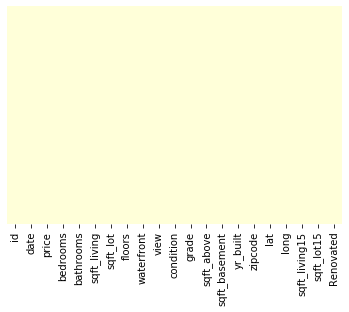

In [24]:
# using a heatmap to visualize where values are missing
sns.heatmap(data_f.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

All clear.

## Dealing with more Data Types

`date`

In [25]:
display(data_f.date.dtype)
data_f.date.head(1)

dtype('O')

0    10/13/2014
Name: date, dtype: object

In [26]:
data_f.date = pd.to_datetime(data_f.date)
data_f.date.min()

Timestamp('2014-05-02 00:00:00')

> This data would be more interesting to me if the dates were spread over a longer period of time. As the dates only cover the span of about one year. I will extract the year and convert the column to a category.

In [27]:
# convert the date to a year only integer
# data_f.date = data_f.date.map(lambda x: x.strftime('%Y')).astype(int)
data_f.date = data_f.date.dt.year.astype('category')

In [28]:
data_f.date.dtype
data_f.date.head(2)

0    2014
1    2014
Name: date, dtype: category
Categories (2, int64): [2014, 2015]

`grade`

In [29]:
display(data_f.grade.dtype)
data_f.grade.unique()

dtype('int64')

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

We can convert `grade` to an ordered category.

In [30]:
grade_dtype = pd.api.types.CategoricalDtype(
    categories=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ordered=True)

# verify the category
data_f.grade.astype(grade_dtype)

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: category
Categories (11, int64): [3 < 4 < 5 < 6 ... 10 < 11 < 12 < 13]

In [31]:
# category order is confirmed
# convert `grade` to the ordered category
data_f.grade = data_f.grade.astype(grade_dtype)
data_f.grade.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ordered=True)

`condition`

In [32]:
data_f.condition.dtype
print(data_f.condition.unique())

[3 5 4 1 2]


Convert `condition` to an ordered category.

In [33]:
condition_dtype = pd.api.types.CategoricalDtype(
    categories=[1, 2, 3, 4, 5], ordered=True)

# convert `condition` to an ordered category
data_f.condition = data_f.condition.astype(condition_dtype)
data_f.condition.dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

`sqft_basement`

In [34]:
# check the current type and first rows
print(data_f.sqft_basement.head(10), "\n", "-"*72)
data_f.sqft_basement.describe()

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object 
 ------------------------------------------------------------------------


count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

A question mark, indeed. Presuming that to be the only non - numerical data in this column and replacing it (them) with mode zero.

In [35]:
# counting question marks
data_f.loc[(data_f['sqft_basement'] == '?'), 'sqft_basement'].count()

454

In [36]:
# replacing question marks with zeros
sb = data_f['sqft_basement']
print(data_f.loc[(data_f['sqft_basement'] == '?'), 'sqft_basement'].count(),
     " rows had ?s")

# convert data type to int
# sb = sb.astype(pd.Int64Dtype()) <-- would not convert directly

# convert placeholder?s to placeholder 1.0 to avoid 0.0 issues
data_f['sqft_basement'] = data_f['sqft_basement'].map(lambda x: 1.0 if x == '?' else x)

pd.to_numeric(data_f['sqft_basement'])

# printing number of ?s if any
try:
    print(data_f.loc[(data_f['sqft_basement'] == '?'), 'sqft_basement'].count(),
     " rows have ?s")
except: # if error from None, print that no rows have ?s
    print("No rows have ?s\n")

print(data_f['sqft_basement'].dtype)
data_f['sqft_basement'][4:8]

454  rows had ?s
0  rows have ?s
object


4       0.0
5    1530.0
6         1
7       0.0
Name: sqft_basement, dtype: object

...Still an object!
### Using a lambda function

In [37]:
# converting one value at - a -time
data_f['sqft_basement'] = data_f['sqft_basement'].map(lambda x: pd.to_numeric(x))

In [38]:
display(data_f['sqft_basement'].dtype)
data_f['sqft_basement'][4:8]

dtype('float64')

4       0.0
5    1530.0
6       1.0
7       0.0
Name: sqft_basement, dtype: float64

### Using mask

In [39]:
# getting those 1s back to 0s
data_f['sqft_basement'].mask(lambda x : x == 1.0, other = 0, inplace=True)

I could probably have used that much sooner.

In [40]:
# checking the number of 0s and ensuring dtype is still float64
data_f.loc[data_f['sqft_basement'] == 1]['sqft_basement'].sum(), data_f['sqft_basement'].dtype

(0.0, dtype('float64'))

## Dealing with Duplicate Columns

In [41]:
# checking for duplicate home IDs (we already created a slice for this)
print("Duplicated IDs: \n", 
      duplicate_ids_df.shape)
print("-"*80)

# checking for complete row duplicates
print("Completely duplicated entries: \n", 
      len(data_f) 
      - len(data_f.duplicated(subset=None, keep='first')))
print("-"*80)

Duplicated IDs: 
 (177, 21)
--------------------------------------------------------------------------------
Completely duplicated entries: 
 0
--------------------------------------------------------------------------------


There are no completely duplicated rows, though there are duplicate property IDs in the dataset.

Since variables can change for a home from one sale to the next (eg., renovation, condition, et al.), we will not exclude these duplicate properties.

***
## Dealing with Outliers

Dealing with outliers should help to make our distributions more normal, which in turn will make our model more reliable.

### Importing required libraries

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcdefaults() # set plt parameters to default

#### Z-scores, IQRs, and Eyeballs

There are a few ways to go about identifying and eliminating outliers.
* The z - score indicates how many standard deviations from the mean is a data point. As we do not yet know whether our residual distributions are normal. it may be too soon to look at these scores to identify outliers.
* The innerquartile range (IQR) rule identifies values that fall outside of the 25th and 75th percentiles by more than 1.5 - times the lower or upper boune.
* We can look at visualizations to see how our data is distributed and make determinations about where should be our cut - off limits.

Since we are still scrubbing our data, we can take a look at IQR for the 3 categorical variables we have not yet converted to dtype 'category.

### Categorical Outliers

We need to take a look at `bedrooms`, `bathrooms`, and `floors`. These columns will need to be converted to categories, after dealing with their outlier values. 

First, we will view their distributions as violinplots.

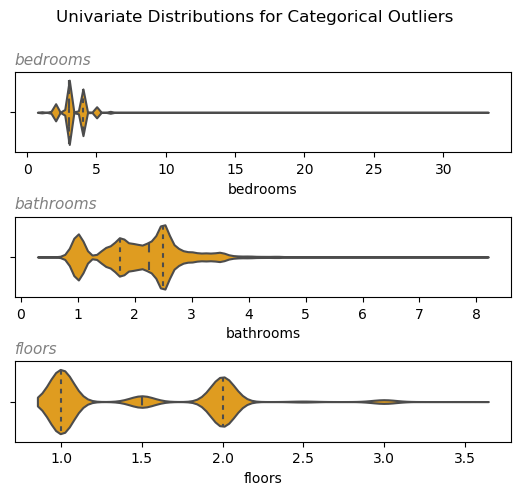

In [43]:
# create a list of the 3 column names
out_list = ['bedrooms', 'bathrooms', 'floors']

# Subplot 3 boxplots for 'bedrooms', 'bathrooms', and 'floors'
fig, ax = plt.subplots(3, 1) # 3 columns, 1 row
plt.suptitle(
    "Univariate Distributions for Categorical Outliers", va='bottom')
plt.subplots_adjust(wspace=.35, hspace=.8) # space between subplots
plot_space = 311 # location of first plot

for col in out_list:    
    plt.subplot(plot_space)
    sns.violinplot( col, data=data_f, color="orange", inner='quartiles')
    plt.title(col, fontsize=11, color='grey', loc='left', style='italic')
    plot_space += 1 # increment to the next row

# plt.show()

I would expect we could set a cut - off at about 6 bedrooms and 5 bathrooms. It doesn't look seem like `floors` would cause much of a problem.

In [44]:
# count of homes with more than 5 bathrooms
display(data_f.loc[data_f['bathrooms'] > 5, ['id'] ].count())

# count of homes with more than 6 bedrooms
data_f.loc[data_f['bedrooms'] > 6, ['id'] ].count()

id    43
dtype: int64

id    62
dtype: int64

So, that is what my eyes tell me. Let's see what the data tells us.

In [45]:
''' a function that takes a dataframe and a list of columns
to view or count outlier rows based on the IQR rule
we only need the upper - bound
'''
def show_iqr_out(data, col_list):
    for cat in col_list:
        q1 = data[cat].quantile(0.25) # 1st quantile
        q3 = data[cat].quantile(0.75) # 2nd quantile
        iqr = q3 - q1 # innerquantile range
        #lower_range = q1 - (1.5 * iqr)
        upper_range = q3 + (1.5 * iqr)
        #below_lower = data[cat] < (lower_range) # below  lower range
        above_upper = data[cat] > (upper_range) # above upper range
        # print outliers
        # print(data[below_lower | above_upper][cat], "\n", "-"*72)
        #print(f"{cat} lower - bound {lower_range}:", 
              #data[below_lower][cat].count(), "\n", "-"*72)
        print(f"{cat} upper - bound {upper_range}:", 
              data[above_upper][cat].count(), "\n", "-"*72)

In [46]:
# pass a list of columns to the function
show_iqr_out(data_f, ['bedrooms', 'bathrooms', 'floors'])

bedrooms upper - bound 5.5: 334 
 ------------------------------------------------------------------------
bathrooms upper - bound 3.625: 557 
 ------------------------------------------------------------------------
floors upper - bound 3.5: 0 
 ------------------------------------------------------------------------


Dropping homes with just 4-or-more bathrooms is quite a bit less forgiving than my eyes. Oh, well.

Let's trim them, first preserving the dataframe in its current state.

## Pickle the current - state dataframe

In [47]:
import pickle

Store the `data_f` dataframe in a sub - directory of the repository as data_f_all, before removing outliers.

In [48]:
with open('data/data_f_all.pickle', 'wb') as f:
    # Pickling the 'data_f' dataframe using the highest protocol available.
    pickle.dump(data_f, f, pickle.HIGHEST_PROTOCOL)

### Remove outliers from `data_f`

In [49]:
# writing a loop based on `show_iqr_out` that drops rows
# for IQR upper - bound outliers
col_list = ['bedrooms', 'bathrooms']

print("shape before outlier removal: ", data_f.shape, "\n", "-"*72)

for cat in col_list:
    q1 = data_f[cat].quantile(0.25)
    q3 = data_f[cat].quantile(0.75)
    iqr = q3 - q1
    upper_range = q3 + (1.5 * iqr)
    data_f.drop(data_f[ data_f[cat] > (upper_range)
                            ].index , inplace=True)

print("\nshape after outlier removal: ", data_f.shape)

shape before outlier removal:  (21597, 21) 
 ------------------------------------------------------------------------

shape after outlier removal:  (21061, 21)


Text(0.0, 1.0, 'bathrooms')

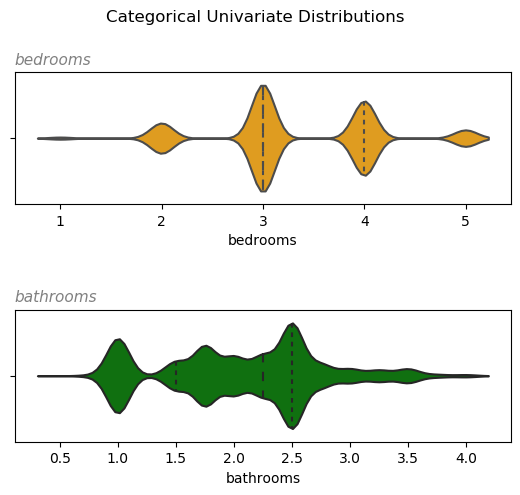

In [50]:
# review boxplots for the outlier - cleaned columns
fig, ax = plt.subplots(2, 1)
plt.subplots_adjust(wspace=.35, hspace=.8) # space between subplots

plt.subplot(211)
plt.suptitle("Categorical Univariate Distributions", va='bottom')
sns.violinplot( 'bedrooms', data=data_f, color="orange", inner='quartiles')
plt.title('bedrooms', fontsize=11, color='grey', loc='left', style='italic')
plt.subplot(212)
sns.violinplot( 'bathrooms', data=data_f, color="green", inner='quartiles')
plt.title('bathrooms', fontsize=11, color='grey', loc='left', style='italic')


# plt.show()

> Those appear to be a bit more central than before.

Now, we can convert them to categories.

`bedrooms`

In [51]:
display(data_f.bedrooms.unique())

array([3, 2, 4, 5, 1], dtype=int64)

In [52]:
# create an ordered 'bedrooms' dtype
bedrooms_dtype = pd.api.types.CategoricalDtype(
    categories=[1,  2,  3,  4,  5], ordered=True)

# convert `condition` to an ordered category
data_f.bedrooms = data_f.bedrooms.astype(bedrooms_dtype)
data_f.bedrooms.dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

`floors`

In [53]:
data_f.floors.value_counts()

1.0    10537
2.0     7916
1.5     1869
3.0      597
2.5      136
3.5        6
Name: floors, dtype: int64

I am curious about those 3.5 floors homes. Let's take a look at them.

In [54]:
# view homes with 3.5 floors
data_f[data_f.floors == 3.5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
10066,1972202010,2014,435000.0,3,3.00,1440,1350,3.5,0,2,3,8,1440,0.0,2005,98103,47.6525,-122.345,1440,1350,0
11582,3180100023,2015,544000.0,3,2.50,1760,1755,3.5,0,0,3,8,1760,0.0,1998,98105,47.6688,-122.279,1700,1721,0
14871,8673400177,2015,525000.0,3,3.00,1730,1074,3.5,0,0,3,8,1730,0.0,2006,98107,47.6692,-122.392,1370,1185,0
15410,1702900664,2015,479000.0,2,2.50,1730,1037,3.5,0,0,3,8,1730,0.0,2008,98118,47.5594,-122.285,1280,1026,0
20292,1972200426,2014,525000.0,2,2.75,1310,1268,3.5,0,0,3,8,1310,0.0,2007,98103,47.6534,-122.355,1350,1288,0
20756,1972200428,2014,563500.0,3,2.50,1400,1312,3.5,0,0,3,8,1400,0.0,2007,98103,47.6534,-122.355,1350,1312,0


They seem valid enough.

#### Converting `floors` to an ordered category.

In [55]:
# create an ordered 'floors' dtype
floors_dtype = pd.api.types.CategoricalDtype(
    categories=[1,  1.5,  2,  2.5,  3,  3.5], ordered=True)

# convert `condition` to an ordered category
data_f.floors = data_f.floors.astype(floors_dtype)
data_f.floors.dtype

CategoricalDtype(categories=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5], ordered=True)

`bathrooms`

In [56]:
display(data_f.bathrooms.dtype)
data_f.bathrooms.unique()

dtype('float64')

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  , 3.5 ,
       0.75, 3.75, 1.25, 0.5 ])

> Instead of converting this column to a category data type, we will want to work on all of those partial baths.

## Dealing with Categorical Data Feature Engineering

Creating binary columns for categorical data: `Renovated` and `waterfront` are already binary, so we do not want to create new columns for them.

### Binning `bathrooms`

To manage the half- and quarter- baths, we can bin this category in the style '.5' for less than 1, '1' for homes with at least one and fewer than two bathroom(s), etc.

In [57]:
# what unique values do we currently have?
data_f.sort_values(by='bathrooms').bathrooms.unique()

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  ])

Currently, we have 15 unique values. Binning should reduce this to 4.

In [58]:
# adding a new bathroom bins column next to the `bathrooms` group
# bins are exclusive of 0 and inclusive of 4
bath_cats = pd.cut(data_f.bathrooms, 
                   bins=[0, .9, 1.9, 2.9, 3.9, 4], 
                   labels=['.5','1',
                           '2','3', '4'])
#insert next to `bathrooms` column
data_f.insert(5,'Full_baths', bath_cats)

In [59]:
# view some rows with various bathroom counts
pd.set_option('display.max_rows', 20)
display(data_f.iloc[70:77, 4:6])

# display bin column data type
data_f.Full_baths.dtype

,bathrooms,Full_baths
71,2.00,2
72,2.00,2
73,2.50,2
74,1.75,1
75,4.00,4
76,1.75,1
77,1.00,1


CategoricalDtype(categories=['.5', '1', '2', '3', '4'], ordered=True)

We see the bin labels have become categories for the new column.

In [60]:
# view rows with partial bathrooms
data_f.loc[data_f['bathrooms'] < 1].head()

,id,date,price,bedrooms,bathrooms,Full_baths,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
208,1222000055,2014,180250.0,2,0.75,.5,900,9600,1.0,0,0,3,6,900,0.0,1941,98166,47.4604,-122.339,1250,14280,0
264,2123039032,2014,369900.0,1,0.75,.5,760,10079,1.0,1,4,5,5,760,0.0,1936,98070,47.4683,-122.438,1230,14267,0
350,7325600160,2014,299000.0,1,0.75,.5,560,12120,1.0,0,0,3,4,560,0.0,1967,98014,47.6750,-121.854,1300,19207,0
465,8658300340,2014,80000.0,1,0.75,.5,430,5050,1.0,0,0,2,4,430,0.0,1912,98014,47.6499,-121.909,1200,7500,0
569,4045500710,2014,405000.0,2,0.75,.5,1160,15029,1.0,0,0,4,6,870,290.0,1937,98014,47.6929,-121.870,1870,25346,0


We can now drop the `baths` column.

In [61]:
# drop `bathrooms`
data_f.drop('bathrooms', axis=1, inplace=True)

That is all we will do for categorical outliers, at this point. We will address numerical, continuous data outliers in the exploratory notebook. In the meantime, we still have some scrubbing and feature engineering to do.

### Getting Dummies

In [62]:
# create a list of categorical column names
cat_list = [col for col in data_f.select_dtypes(include=['category']).columns]

print(cat_list)

['date', 'bedrooms', 'Full_baths', 'floors', 'waterfront', 'view', 'condition', 'grade', 'Renovated']


Now we can create binary columns for our categorical variables (those that already are not).

In [63]:
print([col for col in data_f.columns if (
        2 < len(data_f[col].unique()) < 15)])

['bedrooms', 'Full_baths', 'floors', 'view', 'condition', 'grade']


In [64]:
'''test creating a list of categorical columns 
with more than 2 unique values--verifying only categorical columns 
satisfy the condition and only those that are not already binary
'''
cat_list = []

# run in a function, for use after changing the dataframe's name
def build_cat(dframe): 
    cat_pen = [col for col in dframe.columns if (
        2 < len(dframe[col].unique()) < 15)]
    cat_list.extend(cat_pen)
    return print("cat_list updated")

In [65]:
# checking work: run the function
build_cat(data_f)

print("\nCategorical variables: ", cat_list)
print("-"*72)
no_cat = [col for col in data_f.columns if col not in cat_list]
print("\nRemaining variables: ", no_cat)

cat_list updated

Categorical variables:  ['bedrooms', 'Full_baths', 'floors', 'view', 'condition', 'grade']
------------------------------------------------------------------------

Remaining variables:  ['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Renovated']


That will work. Before we do our one - hot encoding, let's convert that zipcode.

`zip code`

In [66]:
# convert `zipcode` to string and then to a category
data_f['zipcode'] = data_f['zipcode'].astype(str).astype('category')
display(data_f['zipcode'].head(1))

# viewing all column data types
data_f.zipcode.dtype

0    98178
Name: zipcode, dtype: category
Categories (70, object): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

CategoricalDtype(categories=['98001', '98002', '98003', '98004', '98005', '98006',
                  '98007', '98008', '98010', '98011', '98014', '98019',
                  '98022', '98023', '98024', '98027', '98028', '98029',
                  '98030', '98031', '98032', '98033', '98034', '98038',
                  '98039', '98040', '98042', '98045', '98052', '98053',
                  '98055', '98056', '98058', '98059', '98065', '98070',
                  '98072', '98074', '98075', '98077', '98092', '98102',
                  '98103', '98105', '98106', '98107', '98108', '98109',
                  '98112', '98115', '98116', '98117', '98118', '98119',
                  '98122', '98125', '98126', '98133', '98136', '98144',
                  '98146', '98148', '98155', '98166', '98168', '98177',
                  '98178', '98188', '98198', '98199'],
                 ordered=False)

Since there are about to be a lot more columns in `data_f` as we expand categorical variables, let's preserve this state of the dataframe and create a copy.

## Pickle the current - state dataframe

Store the `data_f` dataframe in a sub - directory of the repository as `data_f_no_hots`.

In [67]:
with open('data/data_f_no_hots.pickle', 'wb') as f:
    # Pickling the 'data_f' dataframe using the highest protocol available.
    pickle.dump(data_f, f, pickle.HIGHEST_PROTOCOL)

Making a copy of the dataframe with a new name `data_b`.

In [68]:
# copy the dataframe
data_b = data_f.copy()

# view the first row of the dataframe copy
data_b.head(1)

,id,date,price,bedrooms,Full_baths,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,2014,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0


### Buiding a list of categorical variables and one - hot encoding listed columns

In [69]:
# viewing dataframe shape before processing
print(data_b.shape)

# resetting our `cat_list`
cat_list = []

# runnning our function on the new dataframe
build_cat(data_b)

# vefify cat_list
print(cat_list)

(21061, 21)
cat_list updated
['bedrooms', 'Full_baths', 'floors', 'view', 'condition', 'grade']


In [70]:
# check the `view` dtypes
data_b['view'].unique()

[0, 3, 4, 2, 1]
Categories (5, int64): [0, 3, 4, 2, 1]

In [71]:
# reorder the `view` dtypes, ascending
data_b['view'].cat.reorder_categories(
    [0, 1, 2, 3, 4]
)

data_b['view'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=False)

## One - hot Encoding

The loop in the next cell will:
* create dummies (boolean columns) for column names in our `cat_list`
* concatenate each new column to the dataframe, and
* drop the original columns.

#### Here goes something...

In [72]:
# generate dummies for listed columns
for col in data_b.columns:
    if col in cat_list:
        data_b = pd.concat([data_b, pd.get_dummies(data_b[col], prefix=col,
                                          # not treating nulls as a separate category
                                          # since we no longer have any
                                          dummy_na=False
                                          # drop the original column
                                          )], axis=1).drop([col], axis=1)

In [73]:
# view info and the first row of the dataframe
display(data_b.info())
data_b.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 0 to 21596
Data columns (total 52 columns):
id               21061 non-null int64
date             21061 non-null category
price            21061 non-null float64
sqft_living      21061 non-null int64
sqft_lot         21061 non-null int64
waterfront       21061 non-null category
sqft_above       21061 non-null int64
sqft_basement    21061 non-null float64
yr_built         21061 non-null int64
zipcode          21061 non-null category
lat              21061 non-null float64
long             21061 non-null float64
sqft_living15    21061 non-null int64
sqft_lot15       21061 non-null int64
Renovated        21061 non-null category
bedrooms_1       21061 non-null uint8
bedrooms_2       21061 non-null uint8
bedrooms_3       21061 non-null uint8
bedrooms_4       21061 non-null uint8
bedrooms_5       21061 non-null uint8
Full_baths_.5    21061 non-null uint8
Full_baths_1     21061 non-null uint8
Full_baths_2     21061 non-null uin

None

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,Full_baths_.5,Full_baths_1,Full_baths_2,Full_baths_3,Full_baths_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,2014,221900.0,1180,5650,0,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### One more nulls check for the road

In [74]:
# How many values are null in the database
data_b.isna().sum().sum()

0

In [75]:
display(data_b.describe())
data_b.head(1)

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,Full_baths_.5,Full_baths_1,Full_baths_2,Full_baths_3,Full_baths_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
count,2.106100e+04,2.106100e+04,21061.000000,2.106100e+04,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.00000
mean,4.589620e+09,5.238745e+05,2032.050805,1.482777e+04,1753.754950,272.706187,1970.949433,47.559376,-122.213975,1969.185699,12582.410284,0.009306,0.131048,0.465932,0.322254,0.071459,0.003561,0.395090,0.495086,0.100707,0.005555,0.500309,0.088742,0.375861,0.006457,0.028346,0.000285,0.906795,0.015052,0.042875,0.022126,0.013152,0.001329,0.007929,0.648450,0.263425,0.078866,0.000047,0.001282,0.011348,0.096387,0.420018,0.282418,0.121362,0.049523,0.014719,0.002706,0.00019
std,2.878321e+09,3.206890e+05,841.691338,4.082190e+04,776.970685,420.729176,29.312685,0.139156,0.141131,665.956379,26400.891993,0.096022,0.337461,0.498850,0.467351,0.257596,0.059570,0.488882,0.499988,0.300948,0.074328,0.500012,0.284378,0.484356,0.080100,0.165964,0.016877,0.290727,0.121761,0.202581,0.147097,0.113929,0.036439,0.088695,0.477466,0.440502,0.269536,0.006891,0.035783,0.105923,0.295128,0.493573,0.450186,0.326555,0.216962,0.120429,0.051954,0.01378
min,1.200019e+06,7.800000e+04,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.125049e+09,3.200000e+05,1410.000000,5.015000e+03,1180.000000,0.000000,1951.000000,47.468600,-122.329000,1480.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3.905000e+09,4.475000e+05,1890.000000,7.568000e+03,1540.000000,0.000000,1975.000000,47.570800,-122.231000,1830.000000,7600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.334501e+09,6.300000e+05,2500.000000,1.051100e+04,2170.000000,520.000000,1996.000000,47.678300,-122.125000,2340.000000,10018.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.900000e+09,4.490000e+06,7850.000000,1.651359e+06,7850.000000,3500.000000,2015.000000,47.777600,-121

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,Full_baths_.5,Full_baths_1,Full_baths_2,Full_baths_3,Full_baths_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,2014,221900.0,1180,5650,0,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


## Pickle the current - state dataframe for use in the next notebook

In [76]:
with open('data/data_b.pickle', 'wb') as f:
    # Pickling the 'data_b' dataframe using the highest protocol available.
    pickle.dump(data_b, f, pickle.HIGHEST_PROTOCOL)

## Pickles
#### `data_f_all`: before `bedrooms`, `bathrooms`, and `zipcode` categorization
#### `data_f_no_hots`: with category types and dropped `bathrooms`
#### `data_b`: one - hot encoded

#### Parking Lot

In [77]:
# using scipy's z-score function to detect outliers
#z = np.abs(stats.zscore(_df))

# setting a threshold for a z-score of 3
#display(np.where(z > 3))

In [78]:
# the first outlier is in row 1 at column 18
# display(out_df.iloc[1:2, 17:18]) # 
# display(out_df.loc[1, 'sqft_lot15'])
# print(z[1][18])